In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [2]:
df = pd.read_csv("FastFood-1.csv")
df

,FastFoodNames,Sales
0,1,2600.0
1,1,1483.8
2,1,1195.0
3,1,1470.0
4,1,903.4
5,1,1254.2
6,2,3158.0
7,2,957.0
8,2,1242.0
9,2,1717.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FastFoodNames  24 non-null     int64  
 1   Sales          24 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 512.0 bytes


In [4]:
df.FastFoodNames = pd.Categorical(df.FastFoodNames)

In [1]:
df.info()

NameError: name 'df' is not defined

In [8]:
formula = 'Sales ~ C(FastFoodNames)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(FastFoodNames),3.0,2.771659e+06,923886.427222,1.894999,0.162978
Residual,20.0,9.750783e+06,487539.152833,NaN,NaN


In [9]:
formula = 'Sales ~ C(FastFoodNames)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, type = 2)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(FastFoodNames),3.0,2.771659e+06,923886.427222,1.894999,0.162978
Residual,20.0,9.750783e+06,487539.152833,NaN,NaN


<AxesSubplot:xlabel='FastFoodNames', ylabel='Sales'>

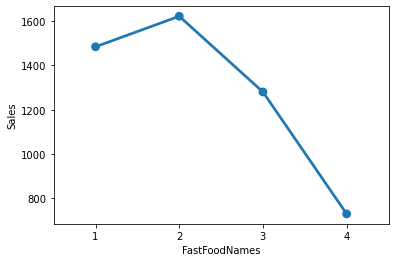

In [11]:
sns.pointplot(x = df.FastFoodNames, y = df.Sales, ci = None )